In [120]:
# https://www.youtube.com/watch?v=ADV-AjAXHdc

import cv2

image_file = "../data/because.jpeg"
img = cv2.imread(image_file)

In [138]:
# https://stackoverflow.com/questions/28816046/displaying-different-images-with-actual-size-in-matplotlib-subplot

import matplotlib as mpl
import matplotlib.pyplot as plt

def display(im_path):

#     dpi = 80
    dpi = mpl.rcParams['figure.dpi']   # Apparently the default dpi changed to 100, so to be safe in the future you can directly access the dpi from the rcParams
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape
#     print(height)
#     print(width)
#     print(depth)

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)
#     print(figsize)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

# display_image_in_actual_size("./your_image.jpg")

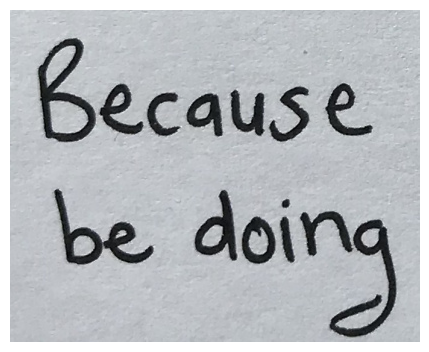

In [139]:
display(image_file)

# 01: Inverted Images

In [123]:
inverted_img = cv2.bitwise_not(img)
cv2.imwrite('../data/temp/inverted.jpeg', inverted_img)

True

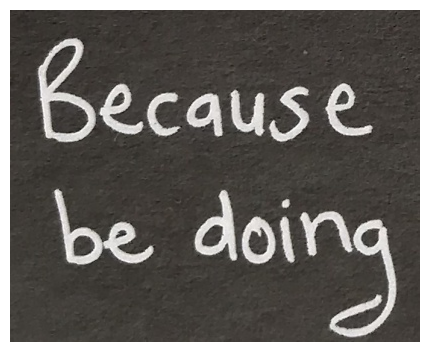

In [124]:
display('../data/temp/inverted.jpeg')

# 02: Rescaling

# 03: Binarization

In [125]:
# This will automatically convert our image file into grayscale
def grayscale(image):
    return cv2.cvtColor(image, cv2. COLOR_BGR2GRAY)

In [126]:
gray_image = grayscale(img)
cv2.imwrite("../data/temp/gray.jpeg", gray_image)

True

In [141]:
# Mera toh error araha hai, tera run hoga toh dekh le

# display("../data/temp/gray.jpeg")

In [ ]:
thresh, im_bw = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
# Edit 127 & 255 as per the requirement

cv2.imwrite('../data/temp/bw_image.jpeg', im_bw)

In [ ]:
# Same, yaha bhi mera run nahi ho raha hai... Tera ho raha hai toh dekh le

# display('../data/temp/bw_image.jpeg')

# 04: Noise Removal

In [ ]:
import numpy as np

def noise_removal(image):
    kernal = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernal, iterations=1)
    kernal = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernal, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernal)
    image = cv2.medianBlur(image, 3)
    return (image)

In [ ]:
no_noise = noise_removal(im_bw)
cv2.imwrite('../data/temp/no_noise.jpeg', no_noise)

In [ ]:
# Yaha bhi nahi hua

# display('../data/temp/no_noise.jpeg')

# 05: Dilation and Erosion

In [ ]:
def thin_font(image):
    image = cv2.bitwise_not(image)
    kernal = np.ones((2, 2), np.uint8)
    image = cv2.erode(image, kernal, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [ ]:
eroded_image = thin_font(no_noise)
cv2.imwrite('../data/temp/eroded_image.jpeg', eroded_image)

In [ ]:
# display('../data/temp/eroded_image.jpeg')

In [ ]:
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernal = np.ones((2, 2), np.uint8)
    image = cv2.dilate(image, kernal, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [ ]:
dilated_image = thick_font(no_noise)
cv2.imwrite('../data/temp/dilated_image.jpg', dilated_image)

In [ ]:
# display("../data/temp/dilated_image.jpeg")

# 06: Rotation/Deskewing

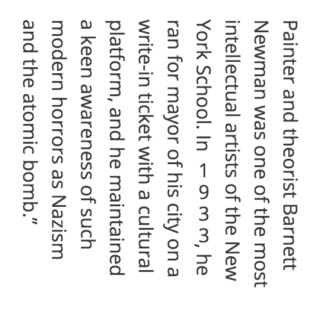

In [153]:
new = cv2.imread('../data/rotated.png')
# new = cv2.imread('../data/skewwed.jpg')

display('../data/rotated.png')

In [154]:
# https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df

# Calculate skew angle of an image
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x, y, w, h = rect
        cv2.rectangle(newImage, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print(len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("../data/temp/boxes.jpg", newImage)

    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle

# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [155]:
fixed = deskew(new)
cv2.imwrite('../data/temp/rotated_fixed.jpg', fixed)

1


True

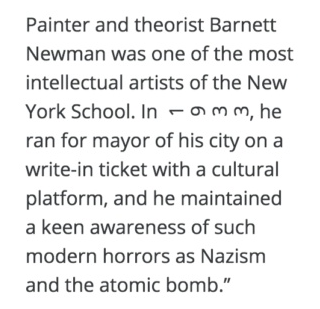

In [156]:
display('../data/temp/rotated_fixed.jpg')

# 07: Removing Borders 

In [ ]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

In [ ]:
no_borders = remove_borders(no_noise)
cv2.imwrite("../data/temp/no_borders.png", no_borders)

In [ ]:
# display('../data/temp/no_borders.png')

# 08: Missing Borders

In [ ]:
color = [255, 255, 255]
top, bottom, left, right = [150]*4

In [ ]:
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite('../data/temp/image_with_border.jpg', image_with_border)

In [ ]:
# display('../data/temp/image_with_border.jpg')

# 09: Transparency/Alpha Channel